In [10]:
import os 
import requests 
import scipy.io as sio
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from rbm import RBM
from utils_projet import lire_alpha_digit, sigmoid
from principal_RBM_alpha import init_RBM, entree_sortie_RBM,\
                                sortie_entree_RBM, train_RBM,\
                                generer_image_RBM

# Entrainer le RBM

In [11]:
# Récuperons les données
digits_list = ['Z']
# X a pour format (n, p). n = 39*nbr_digits pour alphadigits et 20*16 pixels par image
X = lire_alpha_digit(digits_list)
# Numéro de pixels de l'image
p = X.shape[1]
# numero de classes
#q = len(digits_list)
q = 100
# Initializer le RBM 
rbm_unit = init_RBM(p, q)

File already downloaded, using version in data folder..


In [12]:
len(X)

39

Epoch: 0 -- Erreur de reconstruction: 0.28950320512820515
Epoch: 1 -- Erreur de reconstruction: 0.2641826923076923
Epoch: 2 -- Erreur de reconstruction: 0.22716346153846154
Epoch: 3 -- Erreur de reconstruction: 0.2153044871794872
Epoch: 4 -- Erreur de reconstruction: 0.19607371794871795
Epoch: 5 -- Erreur de reconstruction: 0.1778044871794872
Epoch: 6 -- Erreur de reconstruction: 0.17443910256410255
Epoch: 7 -- Erreur de reconstruction: 0.16025641025641027
Epoch: 8 -- Erreur de reconstruction: 0.1560897435897436
Epoch: 9 -- Erreur de reconstruction: 0.14815705128205128
Epoch: 10 -- Erreur de reconstruction: 0.13862179487179488
Epoch: 11 -- Erreur de reconstruction: 0.1342948717948718
Epoch: 12 -- Erreur de reconstruction: 0.1296474358974359
Epoch: 13 -- Erreur de reconstruction: 0.12556089743589743
Epoch: 14 -- Erreur de reconstruction: 0.11666666666666667
Epoch: 15 -- Erreur de reconstruction: 0.1155448717948718
Epoch: 16 -- Erreur de reconstruction: 0.10977564102564102
Epoch: 17 -- E

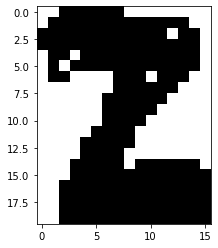

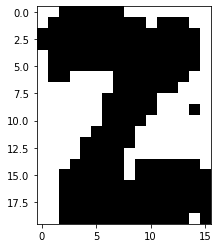

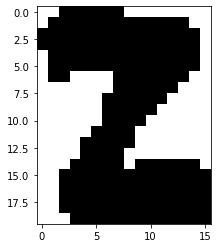

In [13]:
# train 
trained_rbm = train_RBM(rbm_unit, X, epochs=500, learning_rate=0.1, batch_size=3, cd_k=1)
# Reconstruisons les images 
generer_image_RBM(trained_rbm, nbr_iterations_gibbs=1000, nbr_images=3, image_shape=(20, 16))

# DBN

In [ ]:
import os 
import requests 
import scipy.io as sio
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from rbm import RBM
from dnn import DNN
from utils_projet import lire_alpha_digit, sigmoid
from principal_RBM_alpha import init_RBM, entree_sortie_RBM,\
                                sortie_entree_RBM, train_RBM
from principal_DBN_alpha import init_DNN, pretrain_DNN, generer_image_DBN

In [4]:
# Récuperons les données
digits_list = ['A', 'Z']
# digits_list = ['A']
# X a pour format (n, p). n = 39*nbr_digits pour alphadigits et 20*16 pixels par image
X = lire_alpha_digit(digits_list)
# Numéro de pixels de l'image
p = X.shape[1]
# numero de classes

File already downloaded, using version in data folder..


In [5]:
# Initializer le RBM 
# Source: https://www.ki.tu-berlin.de/fileadmin/fg135/publikationen/Hebbo_2013_CDB.pdf
#hidden_layer_size = [1000, 1000, 2000]
hidden_layer_size = [500, 500, 2000]
nbr_classes = len(digits_list)
dnn = init_DNN(p, hidden_layer_size, nbr_classes)

In [6]:
print(nbr_classes)

2


Epoch: 0 -- Erreur de reconstruction: 0.3356169871794872
Epoch: 1 -- Erreur de reconstruction: 0.3018429487179487
Epoch: 2 -- Erreur de reconstruction: 0.27616185897435896
Epoch: 3 -- Erreur de reconstruction: 0.26334134615384613
Epoch: 4 -- Erreur de reconstruction: 0.24503205128205127
Epoch: 5 -- Erreur de reconstruction: 0.22367788461538463
Epoch: 6 -- Erreur de reconstruction: 0.20713141025641027
Epoch: 7 -- Erreur de reconstruction: 0.19787660256410255
Epoch: 8 -- Erreur de reconstruction: 0.1876201923076923
Epoch: 9 -- Erreur de reconstruction: 0.17768429487179488
Epoch: 10 -- Erreur de reconstruction: 0.17303685897435897
Epoch: 11 -- Erreur de reconstruction: 0.1594951923076923
Epoch: 12 -- Erreur de reconstruction: 0.16005608974358973
Epoch: 13 -- Erreur de reconstruction: 0.1485977564102564
Epoch: 14 -- Erreur de reconstruction: 0.1437900641025641
Epoch: 15 -- Erreur de reconstruction: 0.13766025641025642
Epoch: 16 -- Erreur de reconstruction: 0.12908653846153847
Epoch: 17 -- 

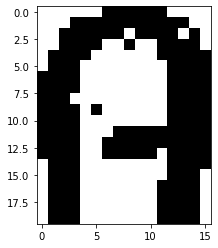

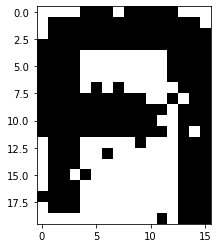

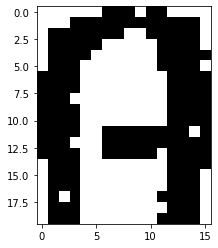

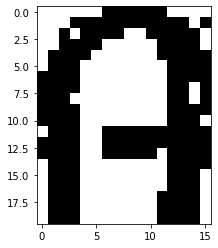

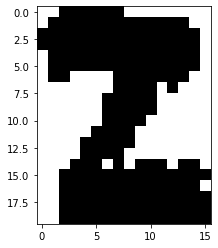

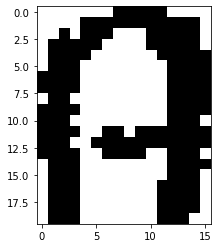

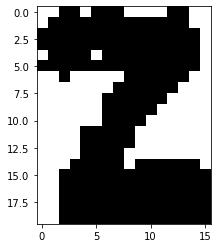

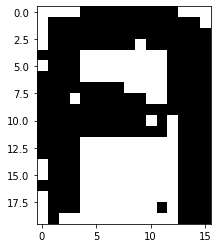

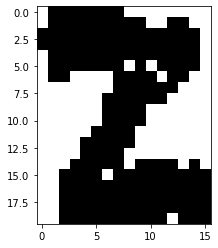

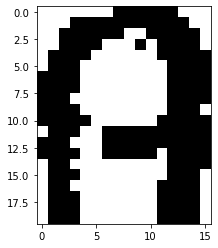

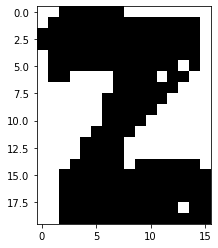

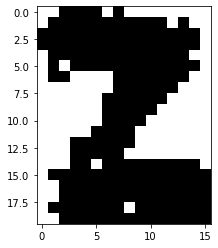

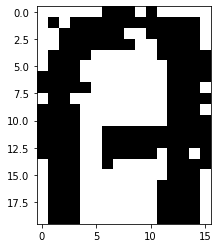

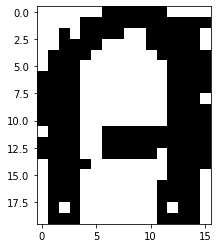

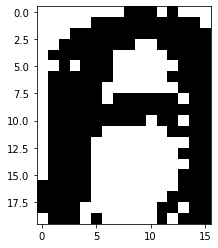

In [7]:
# train 
dnn = pretrain_DNN(dnn, X, epochs=100, learning_rate=0.1, batch_size=10)

#trained_rbm = pretrain_DNN(rbm_unit, X, epochs=50, learning_rate=0.1, batch_size=3, cd_k=1)

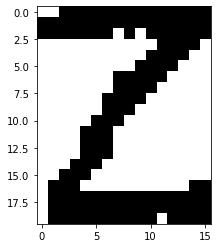

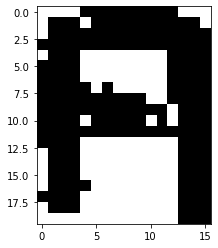

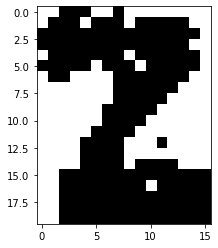

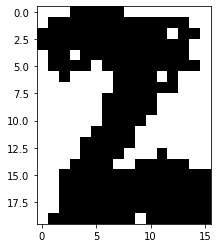

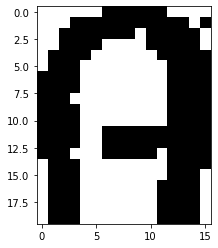

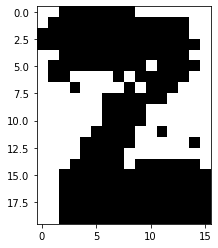

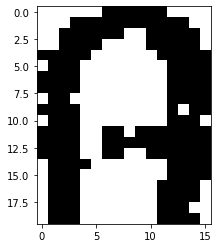

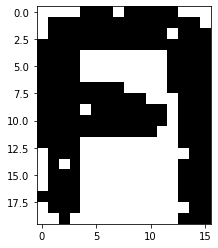

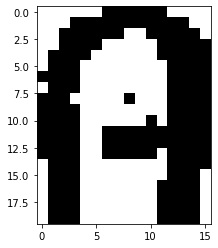

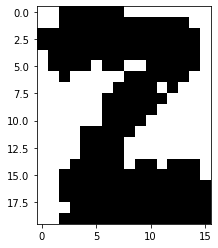

In [9]:
# Reconstruisons les images 
generer_image_DBN(dnn, nbr_iterations_gibbs=1000, nbr_images=10, image_shape=(20, 16))

In [12]:
dnn.DBN[-1].q

1